**JOHN WILSON LORIN**

**BSCS-3A**

# PART 1: DATA PREPROCESSING

In [37]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [29]:
data = pd.read_csv('Netflix_Userbase.csv')

print(data.head())


   User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0        1             Basic               10  15-01-22          10-06-23   
1        2           Premium               15  05-09-21          22-06-23   
2        3          Standard               12  28-02-23          27-06-23   
3        4          Standard               12  10-07-22          26-06-23   
4        5             Basic               10  01-05-23          28-06-23   

          Country  Age  Gender      Device Plan Duration  
0   United States   28    Male  Smartphone       1 Month  
1          Canada   35  Female      Tablet       1 Month  
2  United Kingdom   42    Male    Smart TV       1 Month  
3       Australia   51  Female      Laptop       1 Month  
4         Germany   33    Male  Smartphone       1 Month  


In [30]:
data_dummies = pd.get_dummies(data, drop_first=True)

data_dummies['value'] = data['Subscription Type'].map({'Basic': 0, 'Standard': 1, 'Premium' : 2})
data_dummies['value'] = data_dummies['value'].fillna(0).astype(int)


X = data_dummies.drop(["value", "Monthly Revenue"], axis = 1)
y = data_dummies["value"]

# PART 2: EXPLORATORY DATA ANALYSIS(EDA)

          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


<ipython-input-31-ac2b35a34c87>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Device", y="Monthly Revenue", data=data, edgecolor="gray", palette='Blues')
<ipython-input-31-ac2b35a34c87>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Monthly Revenue", data=data, edgecolor="gray", palette='Oranges')
<ipython-input-31-ac2b35a34c87>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Subscription Type", y="Monthly Revenue", data=data, edgecolor="gray", palette='Greens')


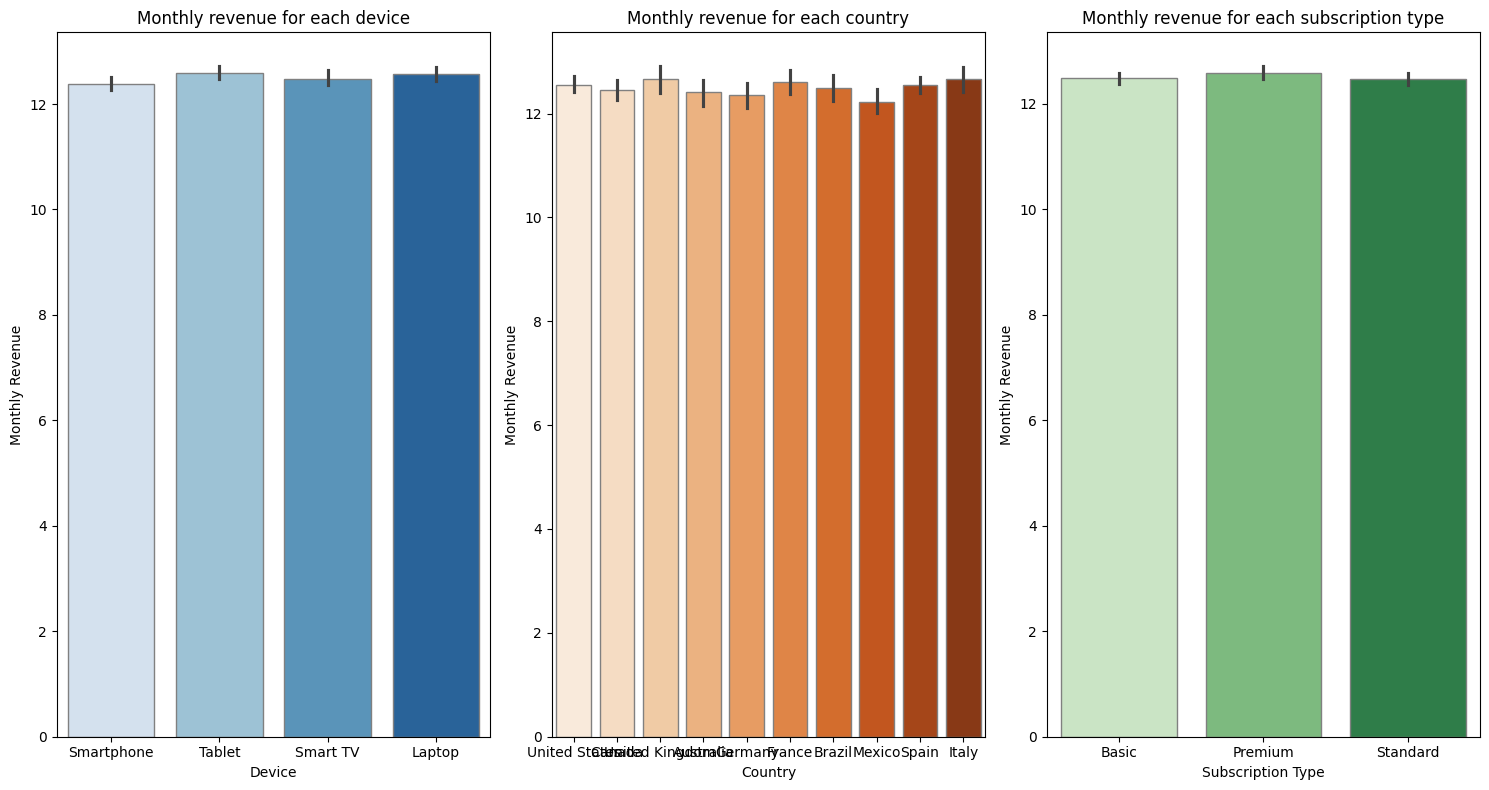

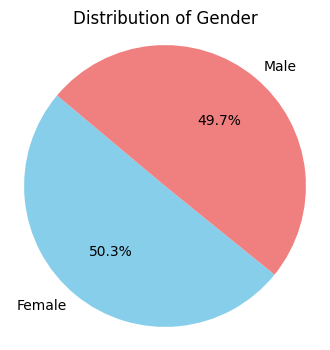

In [31]:
print(data.describe())

plt.figure(figsize=(15, 8))

plt.subplot(1, 3, 1)
sns.barplot(x="Device", y="Monthly Revenue", data=data, edgecolor="gray", palette='Blues')
plt.title("Monthly revenue for each device")

plt.subplot(1, 3, 2)
sns.barplot(x="Country", y="Monthly Revenue", data=data, edgecolor="gray", palette='Oranges')
plt.title("Monthly revenue for each country")

plt.subplot(1, 3, 3)
sns.barplot(x="Subscription Type", y="Monthly Revenue", data=data, edgecolor="gray", palette='Greens')
plt.title("Monthly revenue for each subscription type")

plt.tight_layout()
plt.show()

plt.figure(figsize=(4, 4))
gender_counts = data['Gender'].value_counts()

labels = gender_counts.index
counts = gender_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Gender')
plt.axis('equal')

plt.show()

# PART 3: LINEAR REGRESSION MODEL(PREDICTING MONTHLY REVENUE)

In [32]:
model = LinearRegression()

model.fit(X, y)





LinearRegression()

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)


r2 = r2_score(y_train, y_test)
print(f"R-squared: {r2:.4f}")

# Calculate RMSE
rmse = mean_squared_error(y_train, y_test, squared=False)
print(f"RMSE: {rmse:.4f}")

# Calculate MAE
mae = mean_absolute_error(y_train, y_test)
print(f"MAE: {mae:.4f}")

R-squared: -0.9861
RMSE: 1.1510
MAE: 0.8736


# PART 4: LOGISTIC REGRESSION MODEL (PREDICTIONG CUSTOMER FEEDBACK)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

report = f"""
Accuracy: {accuracy}

 Confusion Matrix:
{conf_matrix}





Classification Report:

{class_report}
"""

print(report)


Accuracy: 1.0

 Confusion Matrix:
[[185   0   0]
 [  0 169   0]
 [  0   0 146]]





Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       169
           2       1.00      1.00      1.00       146

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500




# PART 5: COMPARATIVE ANALYSIS AND VISUALIZATION

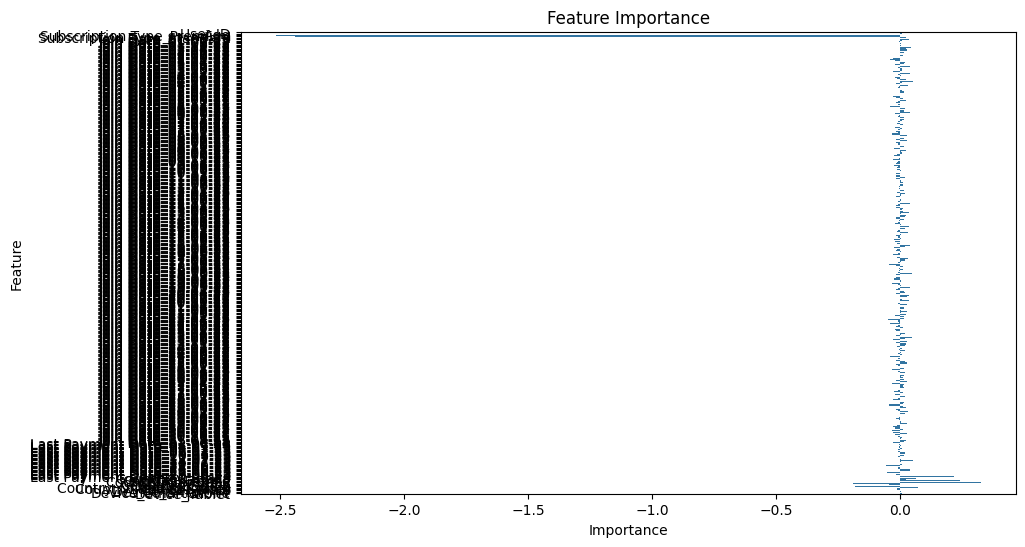

In [42]:
feature = model.coef_[0]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

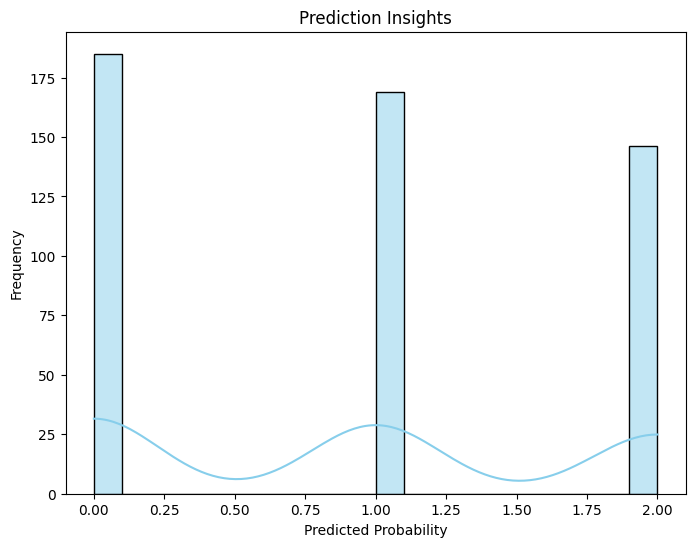

In [44]:
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
sns.histplot(y_pred, bins=20, kde=True, color='skyblue')
plt.title('Prediction Insights')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()
